In [79]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator 
from keras.datasets import fashion_mnist 
from keras import models 
from keras import layers 
from keras import optimizers 
from keras import utils

In [80]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(f"x_train: {x_train.shape}, y_train: {y_train.shape} , x_test: {x_test.shape}, y_test: {y_test.shape}")

x_train: (60000, 28, 28), y_train: (60000,) , x_test: (10000, 28, 28), y_test: (10000,)


In [81]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 784 # кількість атрибутів вхідного вектора 28 * 28 = 784
classes = { 0:"T-shirt/top(футболка)", 
            1: "Trouser(штани)",
            2: "Pullover(світер)",
            3: "Dress(плаття)",
            4: "Coat(пальто)",
            5: "shoes(туфлі)",
            6: "shirt(сорочка)",
            7: "sneakers(кросівки)",
            8: "bag(сумка)",
            9: "Ankle boot(чоботи)"}

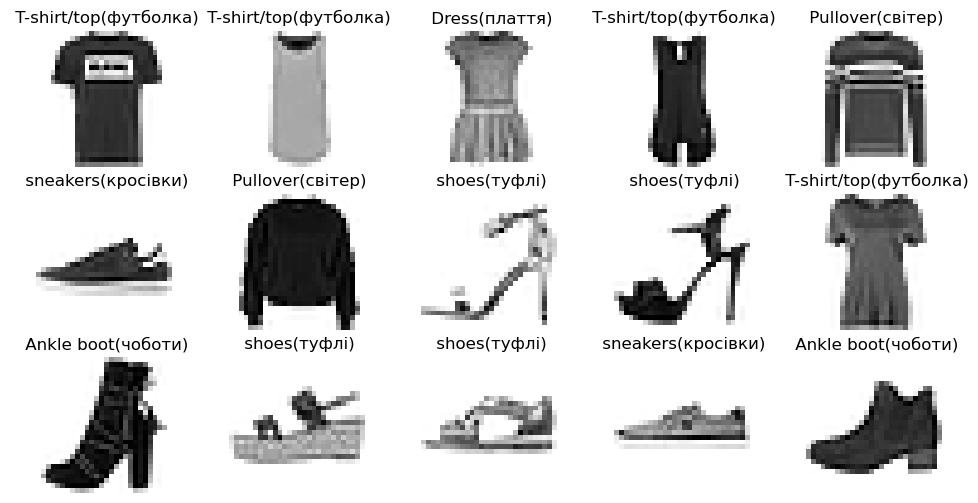

In [82]:

plt.figure(figsize=(12,6))
for i in range(1, 16):
  plt.subplot(3, 5, i-1 + 1)
  plt.imshow(x_train[i],  cmap=plt.cm.binary)
  plt.axis('off')
  plt.title(f" {classes[y_train[i]]}")


In [83]:

# Преобразование размерности изображений

# Преобразуем из (28, 28) в (28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) 

# Преобразуем метки в категории 

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes) 

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}\ny_train: {y_train.shape}, y_test: {y_test.shape}")

x_train: (60000, 28, 28, 1), x_test: (10000, 28, 28, 1)
y_train: (60000, 10), y_test: (10000, 10)


In [84]:
x_train = tf.keras.layers.Concatenate()([x_train, x_train, x_train])
x_test = tf.keras.layers.Concatenate()([x_test, x_test, x_test]) 

print(  'train ', x_train.shape) 

train  (60000, 28, 28, 3)


In [85]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.fit(x_train)

validation_generator = test_datagen.fit(x_test)

In [86]:
train_generator = train_datagen.flow( x_train, y_train, batch_size=150) 
validation_generator = test_datagen.flow( x_test, y_test, batch_size=150)

In [87]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(100, 100, 3))
conv_base.trainable = False
original_dim = (28, 28, 3) 
target_size = (100, 100)

In [88]:
model = models.Sequential([ 
                           layers.Input(original_dim), 
                           layers.Lambda(lambda image: tf.image.resize(image, target_size)),
                           conv_base, 
                           
                           layers.Flatten(), 
                           
                           layers.Dropout(0.3), 
                           layers.Dense(512, activation="relu", kernel_initializer="he_uniform"), 
                           layers.Dense(256, activation="relu"),
                           layers.Dense(10, activation="softmax"), ])

In [89]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_8 (Lambda)           (None, 100, 100, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_9 (Flatten)         (None, 4608)              0         
                                                                 
 dropout_9 (Dropout)         (None, 4608)              0         
                                                                 
 dense_27 (Dense)            (None, 512)               2359808   
                                                                 
 dense_28 (Dense)            (None, 256)               131328    
                                                                 
 dense_29 (Dense)            (None, 10)               

In [90]:
model.compile(  loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),
                metrics=["accuracy"])

In [91]:
history = model.fit(train_generator, 
                    epochs=10, 
                    steps_per_epoch=250,
                    validation_data=validation_generator, 
                    validation_steps=50, 
                    shuffle=True)

Epoch 1/10
250/250 [==============================] - 86s 341ms/step - loss: 0.3546 - accuracy: 0.2458 - val_loss: 0.2405 - val_accuracy: 0.6044
Epoch 2/10
250/250 [==============================] - 82s 327ms/step - loss: 0.2396 - accuracy: 0.5471 - val_loss: 0.1836 - val_accuracy: 0.6823
Epoch 3/10
250/250 [==============================] - 74s 297ms/step - loss: 0.1990 - accuracy: 0.6310 - val_loss: 0.1611 - val_accuracy: 0.7107
Epoch 4/10
250/250 [==============================] - 85s 340ms/step - loss: 0.1778 - accuracy: 0.6677 - val_loss: 0.1484 - val_accuracy: 0.7328
Epoch 5/10
250/250 [==============================] - 87s 349ms/step - loss: 0.1654 - accuracy: 0.6854 - val_loss: 0.1373 - val_accuracy: 0.7445
Epoch 6/10
250/250 [==============================] - 85s 340ms/step - loss: 0.1570 - accuracy: 0.7014 - val_loss: 0.1292 - val_accuracy: 0.7601
Epoch 7/10
250/250 [==============================] - 88s 352ms/step - loss: 0.1503 - accuracy: 0.7146 - val_loss: 0.1287 - val_ac

In [92]:
result_test = model.evaluate(x_test, y_test)
result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

1875/1875 [==============================] - 218s 116ms/step - loss: 1.4688 - accuracy: 0.7048
Відсоток точності тестових даних:  70.43
Відсоток точності навчальних даних:  70.48


In [93]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


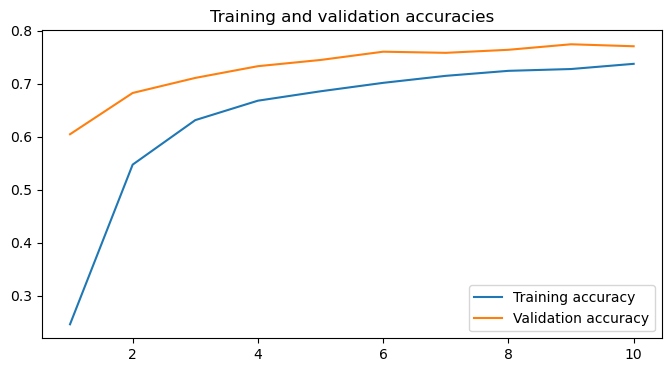

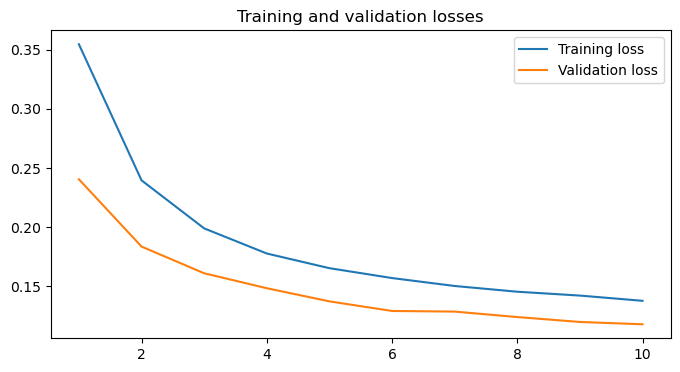

In [94]:
epochs = range(1, len(history.history["accuracy"]) + 1) 

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["accuracy"],   label="Training accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Validation accuracy") 
plt.title("Training and validation accuracies") 
plt.legend() 
plt.figure(figsize=(8, 4)) 
plt.plot(epochs, history.history["loss"],  label="Training loss") 
plt.plot(epochs, history.history["val_loss"], label="Validation loss") 
plt.title("Training and validation losses") 
plt.legend()
plt.show()

In [95]:
model.save("models/vgg16_basesd_model_2.hdf5")

In [96]:
# model = models.load_model("models/vgg16_basesd_model_2.hdf5")

Донавчання

In [97]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [98]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(100, 100, 3))

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

modified_model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(1, activation="sigmoid"),
])


In [99]:
model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),
    metrics=["acc"]
)

history = model.fit(
    train_generator,
    steps_per_epoch=150,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)


Epoch 1/10
150/150 [==============================] - 58s 378ms/step - loss: 0.1357 - acc: 0.7376 - val_loss: 0.1171 - val_acc: 0.7728
Epoch 2/10
150/150 [==============================] - 60s 401ms/step - loss: 0.1345 - acc: 0.7412 - val_loss: 0.1144 - val_acc: 0.7771
Epoch 3/10
150/150 [==============================] - 59s 395ms/step - loss: 0.1333 - acc: 0.7447 - val_loss: 0.1122 - val_acc: 0.7827
Epoch 4/10
150/150 [==============================] - 53s 356ms/step - loss: 0.1321 - acc: 0.7462 - val_loss: 0.1122 - val_acc: 0.7829
Epoch 5/10
150/150 [==============================] - 61s 406ms/step - loss: 0.1303 - acc: 0.7500 - val_loss: 0.1130 - val_acc: 0.7801
Epoch 6/10
150/150 [==============================] - 53s 349ms/step - loss: 0.1292 - acc: 0.7510 - val_loss: 0.1110 - val_acc: 0.7811
Epoch 7/10
150/150 [==============================] - 61s 404ms/step - loss: 0.1293 - acc: 0.7516 - val_loss: 0.1096 - val_acc: 0.7827
Epoch 8/10
150/150 [==============================] - 6

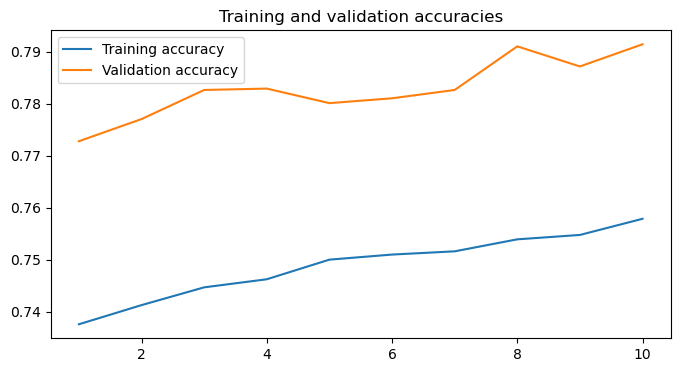

In [101]:
epochs = range(1, len(history.history["acc"]) + 1) 

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["acc"],   label="Training accuracy")
plt.plot(epochs, history.history["val_acc"], label="Validation accuracy") 
plt.title("Training and validation accuracies") 
plt.legend()
plt.show()